# Analyzing ROMS Output
In this notebook, we analyze some output from ROMS.

In [1]:
from roms_tools import Grid, ROMSOutput

For our analysis, we require information about the grid used in the model. We retrieve the grid data using the `Grid.from_file ` method.

In [2]:
grid = Grid.from_file(
    "/global/cfs/cdirs/m4746/Users/elizabeth/EASTPAC25KM/INPUT_FIXED_TOPO/epac25km_grd.nc"
)

WARNING - Vertical coordinates (Cs_r, Cs_w) not found in grid file.
INFO - === Preparing the vertical coordinate system using N = 100, theta_s = 5.0, theta_b = 2.0, hc = 300.0 ===
INFO - Total time: 0.003 seconds
INFO - ========================================================================================================


## Reading in ROMS output data

The `ROMSOutput` class provides a flexible way to load ROMS output files using the `path` parameter, which can be specified in the following ways:
1. **Single file**: If `path` is a single file, only that file will be loaded.
2. **List of files**: If `path` is a list of file paths, the specified files will be loaded in the given order.
3. **Wildcards**: If `path` contains wildcards (e.g., `*rst*.nc`), matching files are loaded in lexicographic order, assuming this reflects the correct temporal sequence (as is the case for standard ROMS output).

For cases 2 and 3, `ROMS-Tools` will attempt to concatenate the files along the time dimension. If this is not possible (e.g., due to inconsistent dimensions or metadata), an error may be thrown.

In the following example, we will read restart files generated during a ROMS simulation. 

### Reading a single file

In [3]:
%%time

roms_output_from_single_file = ROMSOutput(
    grid=grid,
    path="/global/cfs/cdirs/m4746/Users/elizabeth/EASTPAC25KM_Jan1998/output_combined/eastpac25km_rst.19980106000000.nc",
    use_dask=True,
)

/global/cfs/cdirs/m4746/Users/nora/roms-tools/roms_tools/utils.py:142: UserWarning: The specified chunks separate the stored chunks along dimension "time" starting at index 1. This could degrade performance. Instead, consider rechunking after loading.
  ds = xr.open_mfdataset(


CPU times: user 224 ms, sys: 117 ms, total: 340 ms
Wall time: 2.04 s


<div class="alert alert-info">

Note

In the cell above, we read our ROMS output files with `use_dask = True`. This enables `Dask`, a Python library designated to facilitate scalable, out-of-memory data processing by distributing computations across multiple threads or processes. [Here](https://roms-tools.readthedocs.io/en/latest/using_dask.html) you can learn more about using `Dask` with `ROMS-Tools`.

</div>

The `.ds` attribute contains an `xarray.Dataset` with the data that was read in. As you can see, the restart file contains two time stamps (10 minutes apart).

In [4]:
roms_output_from_single_file.ds

<xarray.Dataset> Size: 1GB
Dimensions:                (time: 2, auxil: 6, eta_rho: 162, xi_rho: 122,
                            xi_u: 121, eta_v: 161, s_rho: 100)
Coordinates:
    abs_time               (time) datetime64[ns] 16B 1998-01-05T23:50:00 1998...
    lon_rho                (eta_rho, xi_rho) float64 158kB ...
    lat_rho                (eta_rho, xi_rho) float64 158kB ...
Dimensions without coordinates: time, auxil, eta_rho, xi_rho, xi_u, eta_v, s_rho
Data variables: (12/55)
    ocean_time             (time) float64 16B dask.array<chunksize=(1,), meta=np.ndarray>
    time_step              (time, auxil) int32 48B dask.array<chunksize=(1, 6), meta=np.ndarray>
    zeta                   (time, eta_rho, xi_rho) float64 316kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    ubar                   (time, eta_rho, xi_u) float64 314kB dask.array<chunksize=(1, 162, 121), meta=np.ndarray>
    vbar                   (time, eta_v, xi_rho) float64 314kB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    MARBL_PH_3D            (time, s_rho, eta_rho, xi_rho) float64 32MB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
    ...                     ...
    DV_avg_bak             (time, eta_v, xi_rho) float64 314kB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    hbls                   (time, eta_rho, xi_rho) float64 316kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    hbbl                   (time, eta_rho, xi_rho) float64 316kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    u_slow                 (time, s_rho, eta_rho, xi_u) float64 31MB dask.array<chunksize=(1, 100, 162, 121), meta=np.ndarray>
    v_slow                 (time, s_rho, eta_v, xi_rho) float64 31MB dask.array<chunksize=(1, 100, 161, 122), meta=np.ndarray>
    p_slow                 (time, s_rho, eta_rho, xi_rho) float64 32MB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
Attributes: (12/35)
    title:                 eastpac25km , 25km resolution
    grid_file:             /pscratch/sd/e/eay/EASTPAC25KM/INPUT_FIXED_TOPO/ep...
    init_file:             /pscratch/sd/e/eay/EASTPAC25KM_spinup/output/eastp...
    ntimes:                4610
    ndtfast:               45
    dt:                    600.0
    ...                    ...
    SRCS:                  SRCS $(shell ls *$(UPF77_ext)) SRCS : $(filter-out...
    CPPS:                  <cppdefs.opt> PACIFIC_PD SOLVE3D UV_ADV UV_COR ADV...
    surf_forcing_strings:  
    bc_options:             OBC_WEST, OBC_NORTH, OBC_SOUTH, OBC_M3ORLANSKI, O...
    git_version:           
    type:                  ROMS restart file

### Reading a list of files

In [5]:
%%time

roms_output_from_list_of_files = ROMSOutput(
    grid=grid,
    path=[
        "/global/cfs/cdirs/m4746/Users/elizabeth/EASTPAC25KM_Jan1998/output_combined/eastpac25km_rst.19980106000000.nc",
        "/global/cfs/cdirs/m4746/Users/elizabeth/EASTPAC25KM_Jan1998/output_combined/eastpac25km_rst.20010201000000.nc",
    ],
    use_dask=True,
)

CPU times: user 90.7 ms, sys: 178 μs, total: 90.9 ms
Wall time: 279 ms


The two specified restart files were concatenated into a single `xarray.Dataset`, which now contains 4 time stamps.

In [6]:
roms_output_from_list_of_files.ds

<xarray.Dataset> Size: 3GB
Dimensions:                (time: 4, auxil: 6, eta_rho: 162, xi_rho: 122,
                            xi_u: 121, eta_v: 161, s_rho: 100)
Coordinates:
    abs_time               (time) datetime64[ns] 32B 1998-01-05T23:50:00 ... ...
    lon_rho                (eta_rho, xi_rho) float64 158kB ...
    lat_rho                (eta_rho, xi_rho) float64 158kB ...
Dimensions without coordinates: time, auxil, eta_rho, xi_rho, xi_u, eta_v, s_rho
Data variables: (12/55)
    ocean_time             (time) float64 32B dask.array<chunksize=(1,), meta=np.ndarray>
    time_step              (time, auxil) int32 96B dask.array<chunksize=(1, 6), meta=np.ndarray>
    zeta                   (time, eta_rho, xi_rho) float64 632kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    ubar                   (time, eta_rho, xi_u) float64 627kB dask.array<chunksize=(1, 162, 121), meta=np.ndarray>
    vbar                   (time, eta_v, xi_rho) float64 629kB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    MARBL_PH_3D            (time, s_rho, eta_rho, xi_rho) float64 63MB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
    ...                     ...
    DV_avg_bak             (time, eta_v, xi_rho) float64 629kB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    hbls                   (time, eta_rho, xi_rho) float64 632kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    hbbl                   (time, eta_rho, xi_rho) float64 632kB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    u_slow                 (time, s_rho, eta_rho, xi_u) float64 63MB dask.array<chunksize=(1, 100, 162, 121), meta=np.ndarray>
    v_slow                 (time, s_rho, eta_v, xi_rho) float64 63MB dask.array<chunksize=(1, 100, 161, 122), meta=np.ndarray>
    p_slow                 (time, s_rho, eta_rho, xi_rho) float64 63MB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
Attributes: (12/35)
    title:                 eastpac25km , 25km resolution
    grid_file:             /pscratch/sd/e/eay/EASTPAC25KM/INPUT_FIXED_TOPO/ep...
    init_file:             /pscratch/sd/e/eay/EASTPAC25KM_spinup/output/eastp...
    ntimes:                4610
    ndtfast:               45
    dt:                    600.0
    ...                    ...
    SRCS:                  SRCS $(shell ls *$(UPF77_ext)) SRCS : $(filter-out...
    CPPS:                  <cppdefs.opt> PACIFIC_PD SOLVE3D UV_ADV UV_COR ADV...
    surf_forcing_strings:  
    bc_options:             OBC_WEST, OBC_NORTH, OBC_SOUTH, OBC_M3ORLANSKI, O...
    git_version:           
    type:                  ROMS restart file

### Reading files with wildcards

In [7]:
%%time

roms_output = ROMSOutput(
    grid=grid,
    path="/global/cfs/cdirs/m4746/Users/elizabeth/EASTPAC25KM_Jan1998/output_combined/*rst*.nc",
    use_dask=True,
)

CPU times: user 12.4 s, sys: 3.17 s, total: 15.5 s
Wall time: 1min 11s


The specified directory contains 222 restart files, all of which were concatenated into one dataset. (The concatenation takes some time, even though we used `use_dask = True`.)

In [8]:
roms_output.ds

<xarray.Dataset> Size: 288GB
Dimensions:                (time: 444, auxil: 6, eta_rho: 162, xi_rho: 122,
                            xi_u: 121, eta_v: 161, s_rho: 100)
Coordinates:
    abs_time               (time) datetime64[ns] 4kB 1998-01-05T23:50:00 ... ...
    lon_rho                (eta_rho, xi_rho) float64 158kB ...
    lat_rho                (eta_rho, xi_rho) float64 158kB ...
Dimensions without coordinates: time, auxil, eta_rho, xi_rho, xi_u, eta_v, s_rho
Data variables: (12/55)
    ocean_time             (time) float64 4kB dask.array<chunksize=(1,), meta=np.ndarray>
    time_step              (time, auxil) int32 11kB dask.array<chunksize=(1, 6), meta=np.ndarray>
    zeta                   (time, eta_rho, xi_rho) float64 70MB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    ubar                   (time, eta_rho, xi_u) float64 70MB dask.array<chunksize=(1, 162, 121), meta=np.ndarray>
    vbar                   (time, eta_v, xi_rho) float64 70MB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    MARBL_PH_3D            (time, s_rho, eta_rho, xi_rho) float64 7GB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
    ...                     ...
    DV_avg_bak             (time, eta_v, xi_rho) float64 70MB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    hbls                   (time, eta_rho, xi_rho) float64 70MB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    hbbl                   (time, eta_rho, xi_rho) float64 70MB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    u_slow                 (time, s_rho, eta_rho, xi_u) float64 7GB dask.array<chunksize=(1, 100, 162, 121), meta=np.ndarray>
    v_slow                 (time, s_rho, eta_v, xi_rho) float64 7GB dask.array<chunksize=(1, 100, 161, 122), meta=np.ndarray>
    p_slow                 (time, s_rho, eta_rho, xi_rho) float64 7GB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
Attributes: (12/35)
    title:                 eastpac25km , 25km resolution
    grid_file:             /pscratch/sd/e/eay/EASTPAC25KM/INPUT_FIXED_TOPO/ep...
    init_file:             /pscratch/sd/e/eay/EASTPAC25KM_spinup/output/eastp...
    ntimes:                4610
    ndtfast:               45
    dt:                    600.0
    ...                    ...
    SRCS:                  SRCS $(shell ls *$(UPF77_ext)) SRCS : $(filter-out...
    CPPS:                  <cppdefs.opt> PACIFIC_PD SOLVE3D UV_ADV UV_COR ADV...
    surf_forcing_strings:  
    bc_options:             OBC_WEST, OBC_NORTH, OBC_SOUTH, OBC_M3ORLANSKI, O...
    git_version:           
    type:                  ROMS restart file

Let's verify that the time dimension has been concatenated in a linear sequence.

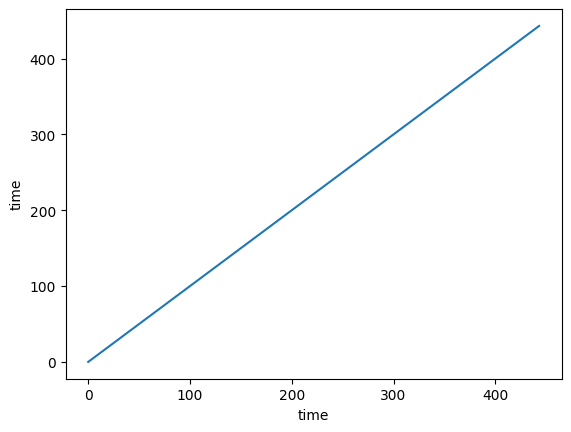

In [9]:
roms_output.ds.time.plot()

## Plotting ROMS output data
Next, we make some plots of our ROMS model output. We can plot horizontal or vertical slices.

[########################################] | 100% Completed | 202.27 ms


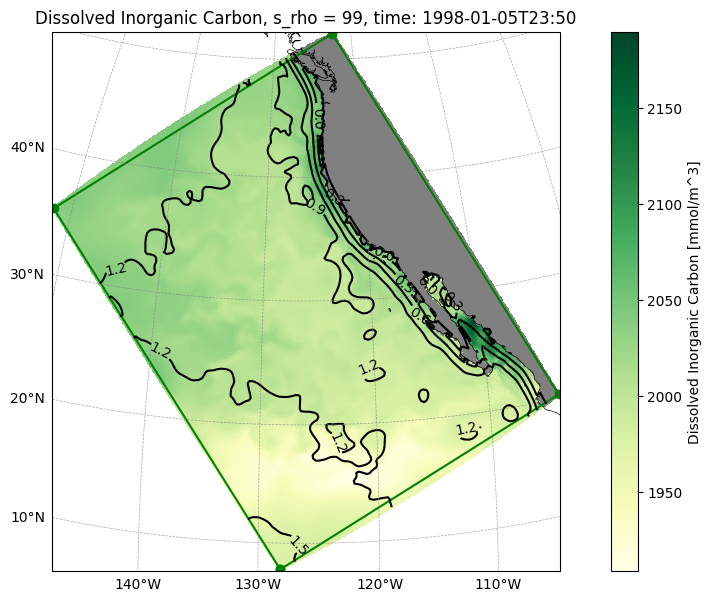

In [10]:
roms_output.plot("DIC", time=0, s=-1, depth_contours=True)  # uppermost layer

[########################################] | 100% Completed | 101.10 ms


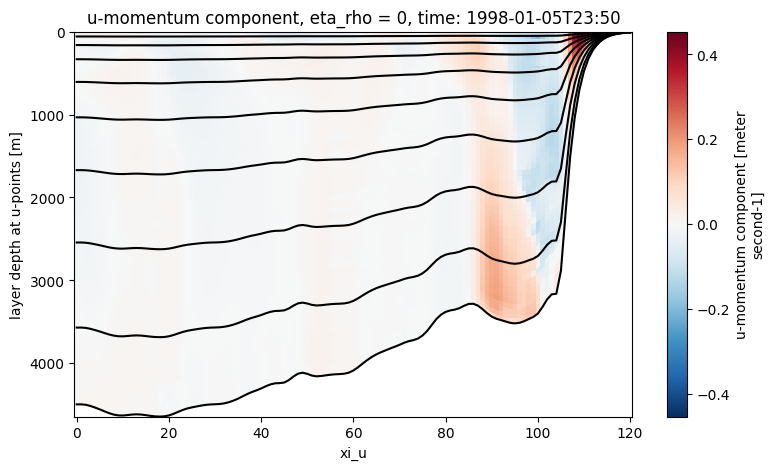

In [11]:
roms_output.plot("u", time=0, eta=0, layer_contours=True)

Or we can look at the depth profile of our favorite variable.

[########################################] | 100% Completed | 101.11 ms


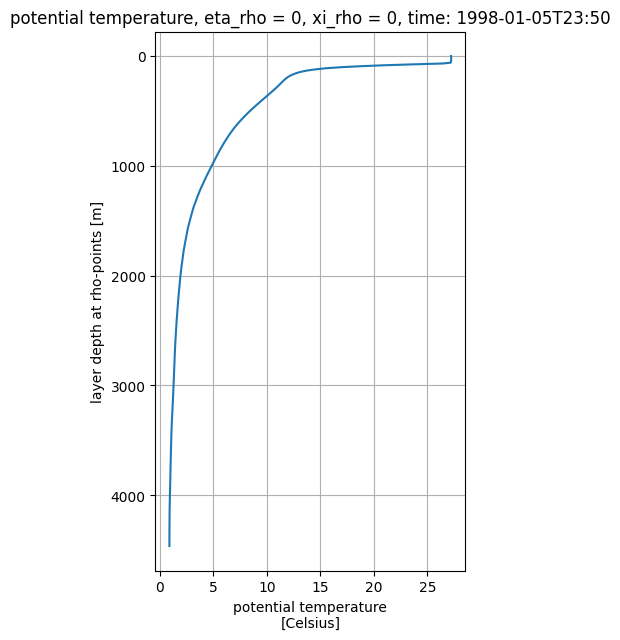

In [12]:
roms_output.plot("temp", time=0, xi=0, eta=0)

We can also plot the spatial variability of temperature (or any other variable) for a specified layer and eta (or xi) slice.

[########################################] | 100% Completed | 101.08 ms


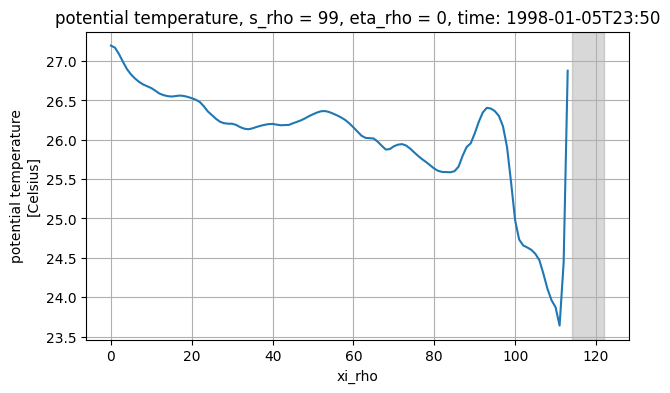

In [13]:
roms_output.plot("temp", time=0, s=-1, eta=0)

## Adding depth coordinates
For some of the plots above, depth coordinates, which are derived from topography and sea surface height, were automatically computed. However, you also have the option to explicitly add depth coordinates to the dataset yourself.

In [14]:
roms_output.compute_depth_coordinates(depth_type="layer", locations=["rho", "u"])

The cell above added two more data variables to the dataset: `layer_depth_rho` and `layer_depth_u`.

In [15]:
roms_output.ds

<xarray.Dataset> Size: 302GB
Dimensions:                (time: 444, auxil: 6, eta_rho: 162, xi_rho: 122,
                            xi_u: 121, eta_v: 161, s_rho: 100)
Coordinates:
    abs_time               (time) datetime64[ns] 4kB 1998-01-05T23:50:00 ... ...
    lon_rho                (eta_rho, xi_rho) float64 158kB 231.8 232.0 ... 237.5
    lat_rho                (eta_rho, xi_rho) float64 158kB 7.664 7.775 ... 52.28
Dimensions without coordinates: time, auxil, eta_rho, xi_rho, xi_u, eta_v, s_rho
Data variables: (12/57)
    ocean_time             (time) float64 4kB dask.array<chunksize=(1,), meta=np.ndarray>
    time_step              (time, auxil) int32 11kB dask.array<chunksize=(1, 6), meta=np.ndarray>
    zeta                   (time, eta_rho, xi_rho) float64 70MB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    ubar                   (time, eta_rho, xi_u) float64 70MB dask.array<chunksize=(1, 162, 121), meta=np.ndarray>
    vbar                   (time, eta_v, xi_rho) float64 70MB dask.array<chunksize=(1, 161, 122), meta=np.ndarray>
    MARBL_PH_3D            (time, s_rho, eta_rho, xi_rho) float64 7GB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
    ...                     ...
    hbbl                   (time, eta_rho, xi_rho) float64 70MB dask.array<chunksize=(1, 162, 122), meta=np.ndarray>
    u_slow                 (time, s_rho, eta_rho, xi_u) float64 7GB dask.array<chunksize=(1, 100, 162, 121), meta=np.ndarray>
    v_slow                 (time, s_rho, eta_v, xi_rho) float64 7GB dask.array<chunksize=(1, 100, 161, 122), meta=np.ndarray>
    p_slow                 (time, s_rho, eta_rho, xi_rho) float64 7GB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
    layer_depth_rho        (time, s_rho, eta_rho, xi_rho) float64 7GB dask.array<chunksize=(1, 100, 162, 122), meta=np.ndarray>
    layer_depth_u          (time, s_rho, eta_rho, xi_u) float64 7GB dask.array<chunksize=(1, 100, 162, 121), meta=np.ndarray>
Attributes: (12/35)
    title:                 eastpac25km , 25km resolution
    grid_file:             /pscratch/sd/e/eay/EASTPAC25KM/INPUT_FIXED_TOPO/ep...
    init_file:             /pscratch/sd/e/eay/EASTPAC25KM_spinup/output/eastp...
    ntimes:                4610
    ndtfast:               45
    dt:                    600.0
    ...                    ...
    SRCS:                  SRCS $(shell ls *$(UPF77_ext)) SRCS : $(filter-out...
    CPPS:                  <cppdefs.opt> PACIFIC_PD SOLVE3D UV_ADV UV_COR ADV...
    surf_forcing_strings:  
    bc_options:             OBC_WEST, OBC_NORTH, OBC_SOUTH, OBC_M3ORLANSKI, O...
    git_version:           
    type:                  ROMS restart file